# Customer segmentation using k-means algorithm

In [11]:
# import required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline 

Data Collection & Preparation

In [6]:
# loading the data from csv file to a Pandas DataFrame
# use mall customer daatset 
customer_data = pd.read_csv('D:\AI\Practicing Machine learnig\Projects\Mall_Customers.csv')

In [7]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# last 5 rows in the dataframe
customer_data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [9]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [ ]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
# checking for missing values
customer_data.isnull().sum()

# this dataset does not contain any missing values 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Visuvalising feature distributions 

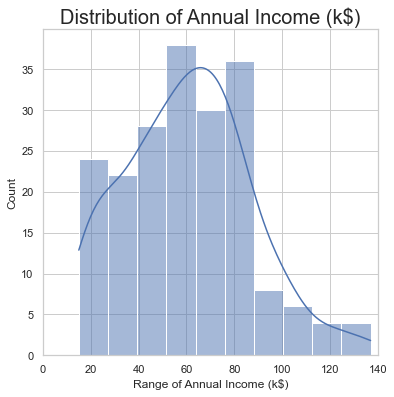

In [19]:
#Distribution of Annnual Income
plt.figure(figsize=(6, 6))
sns.set(style = 'whitegrid')
sns.histplot(customer_data['Annual Income (k$)'], kde = True)
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.xlim((0, 140))
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

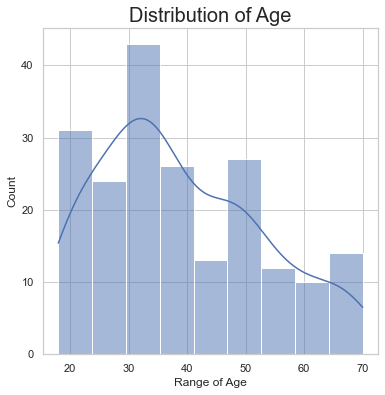

In [20]:
#Distribution of age
plt.figure(figsize=(6, 6))
sns.set(style = 'whitegrid')
sns.histplot(customer_data['Age'], kde = True)
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

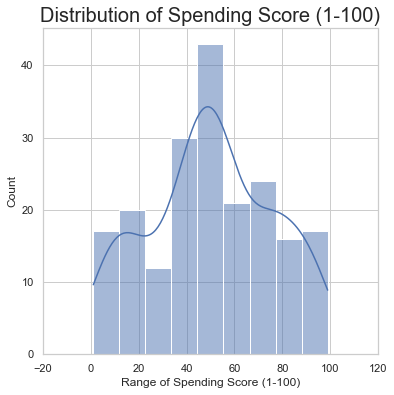

In [22]:
#Distribution of spending score
plt.figure(figsize=(6, 6))
sns.set(style = 'whitegrid')
sns.histplot(customer_data['Spending Score (1-100)'], kde = True)
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)'); plt.xlim((-20, 120))
plt.ylabel('Count')

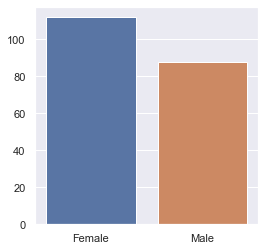

In [27]:
genders = customer_data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(4,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

# Clustering based on two features 

Choosing the Annual Income Column & Spending Score column

In [28]:
X = customer_data.iloc[:,[3,4]].values

In [30]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

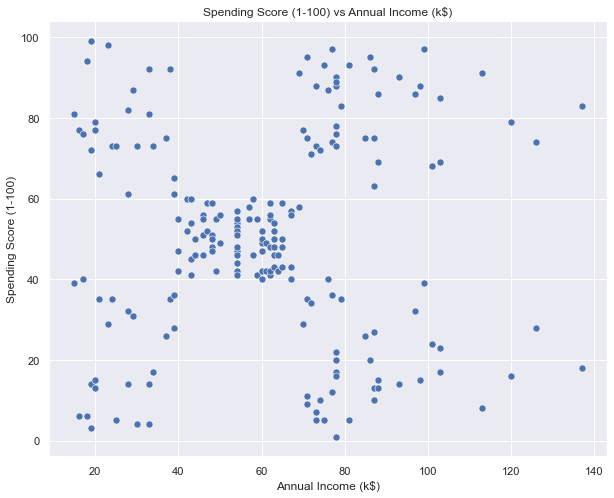

In [34]:
#Scatterplot of the input data
plt.figure(figsize=(10,8))
sns.scatterplot(x = X[:,0],y = X[:,1],  data = X  ,s = 50 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

# Choosing the number of clusters(k)

WCSS  ->  Within Clusters Sum of Squares

In [36]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,12):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=40) # random_state for centroid initialization 
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)  # Sum of squared distances of samples to their closest cluster center, 
print(wcss)

[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37265.86520484345, 30259.657207285458, 25044.96776401891, 21884.744095710266, 19692.55741822776, 17869.182175177764]


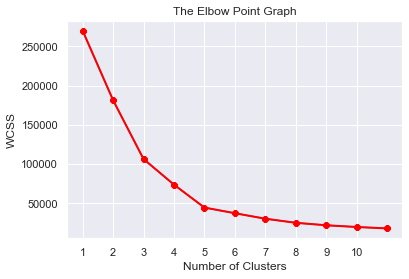

In [38]:
# plot an elbow graph

sns.set()
plt.plot(range(1,12), wcss)
plt.plot(range(1,12),wcss, linewidth=2, color="red", marker ="8")
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters'), plt.xticks(np.arange(1,11,1))
plt.ylabel('WCSS')
plt.show()



According to the elbow graph: Optimum Number of Clusters = 5

# Training the k-Means Clustering Model

In [40]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=1)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 2 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 2 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


5 Clusters -  0, 1, 2, 3, 4

Visualizing all the Clusters

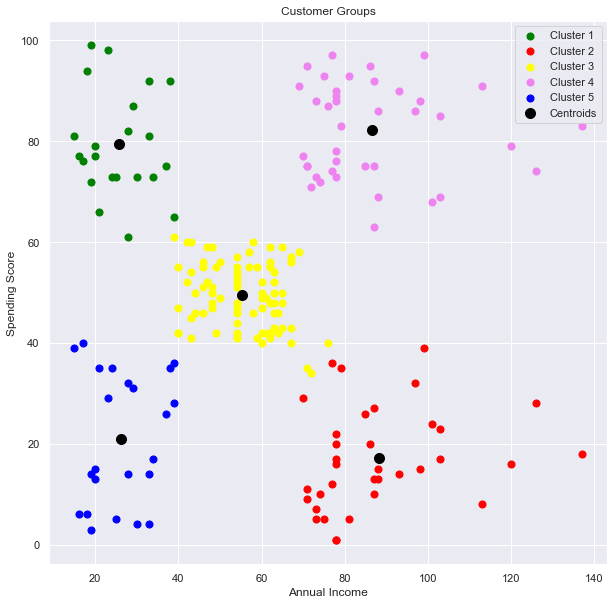

In [44]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(10,10))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

# we can clearly see all 5 clusters, based on the plot we can identify each region 

# Clustering based on three features 

Features : Age , annual income, Spending Score 

In [48]:
XX = customer_data.iloc[:,[2,3,4]].values
print(XX[0:5,])

[[19 15 39]
 [21 15 81]
 [20 16  6]
 [23 16 77]
 [31 17 40]]


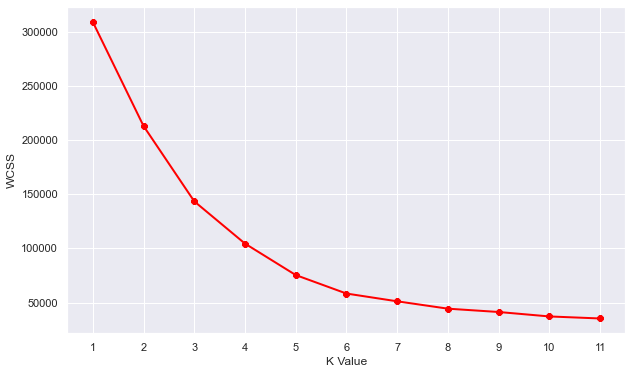

In [51]:
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,12):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(XX)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))    
plt.plot(range(1,12),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,12,1))
plt.ylabel("WCSS")
plt.show()

# here we can assume K = 5

In [52]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=1)

# return a label for each data point based on their cluster
YY = kmeans.fit_predict(XX)

print(YY)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 0 2 4 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 4 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


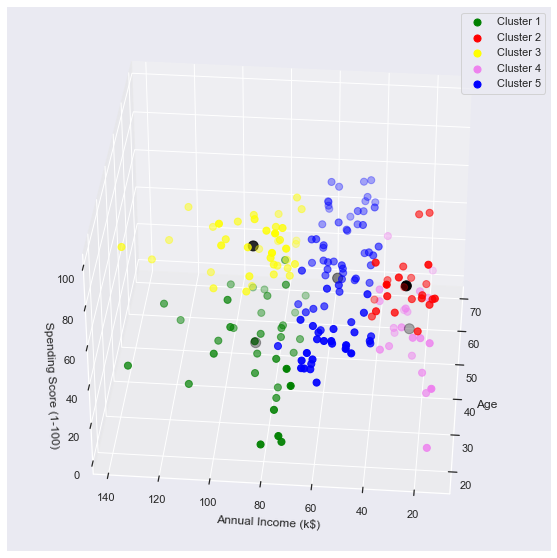

In [61]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(XX[YY==0,0], XX[YY==0,1], XX[YY==0,2],  s=50, c='green', label='Cluster 1')
ax.scatter(XX[YY==1,0], XX[YY==1,1], XX[YY==1,2], s=50, c='red', label='Cluster 2')
ax.scatter(XX[YY==2,0], XX[YY==2,1], XX[YY==2,2],s=50, c='yellow', label='Cluster 3')
ax.scatter(XX[YY==3,0], XX[YY==3,1], XX[YY==3,2],s=50, c='violet', label='Cluster 4')
ax.scatter(XX[YY==4,0], XX[YY==4,1], XX[YY==4,2],s=50, c='blue', label='Cluster 5')
ax.view_init(35, 185)
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
# plot the centroids
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2],s=100, c='black', label='Centroids')


plt.show()

In [63]:
# Adding cluster label to dataset
customer_data["Cluster_labels"] = YY
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_labels
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


In [68]:
# Getting customerIDs which belong to a particular class
# cluster : 1
c_id_1 = customer_data[ customer_data["Cluster_labels"]==1]
print(c_id_1['CustomerID'].values)

[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46]
